In [23]:
from __future__ import print_function

In [25]:
y, sr = librosa.load('09 - Spoonful of Sugar, A.mp3')

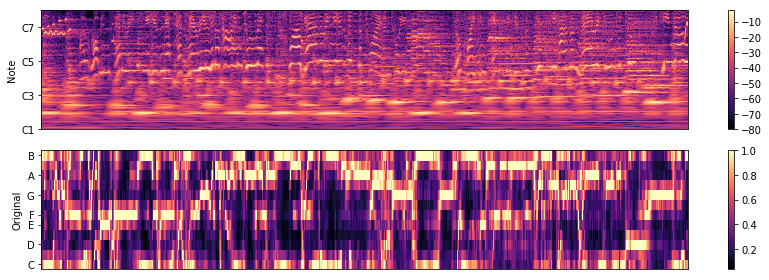

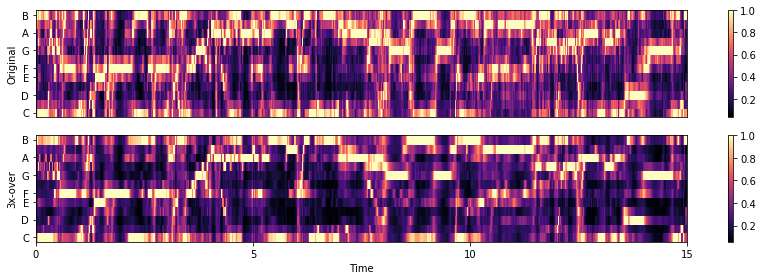

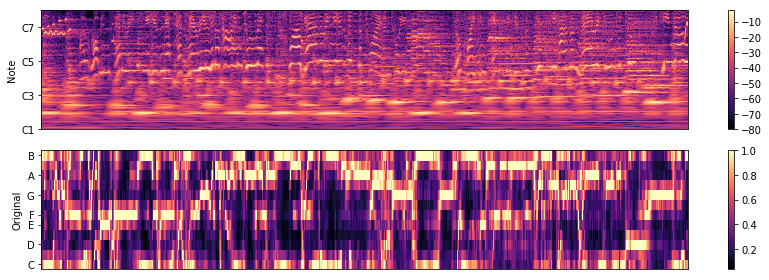

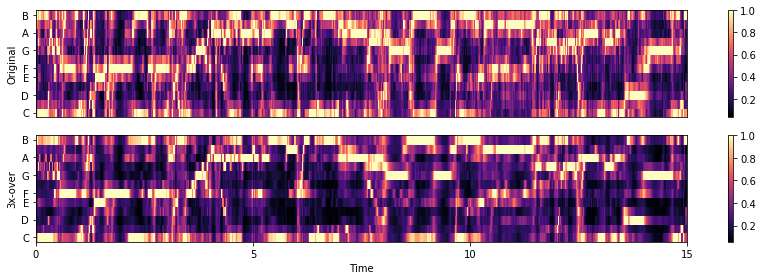

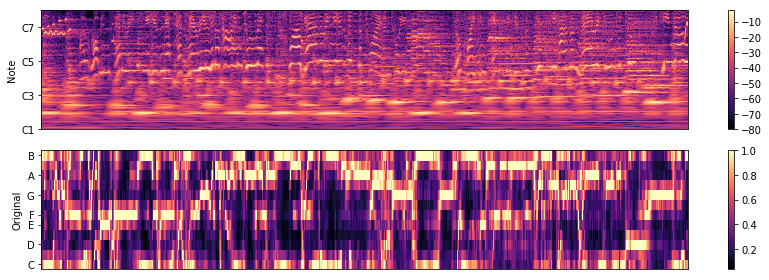

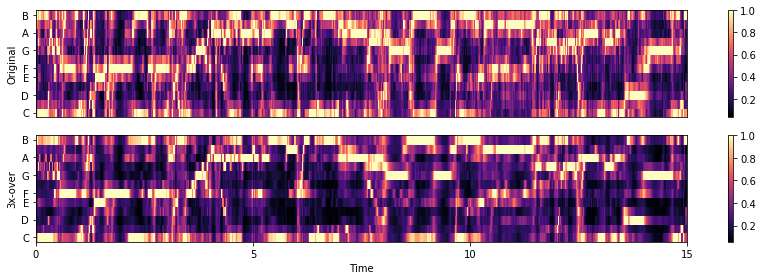

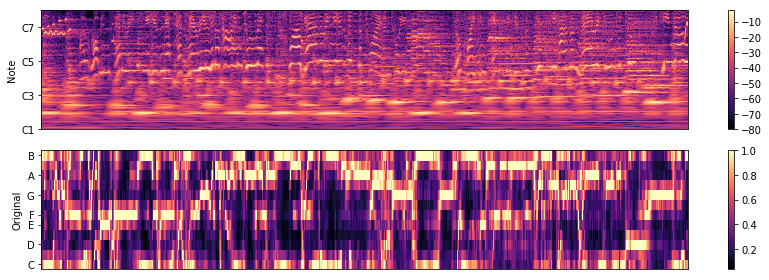

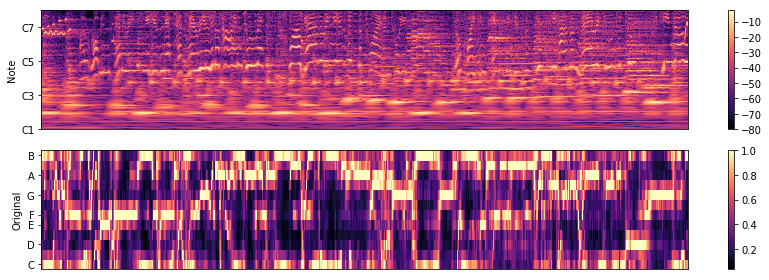

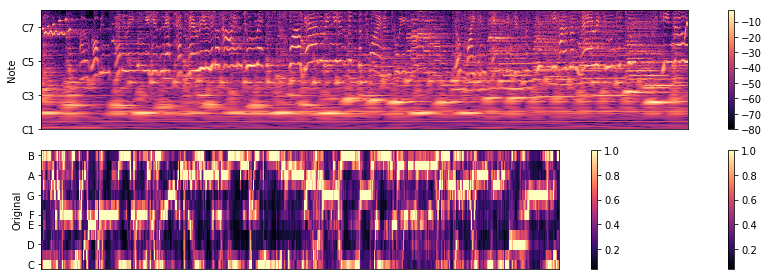

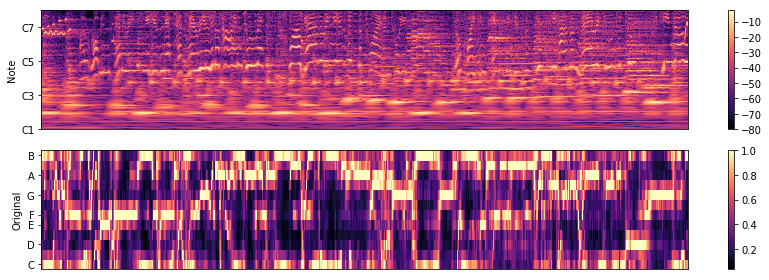

In [26]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([45, 60])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))


plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()
plt.show()

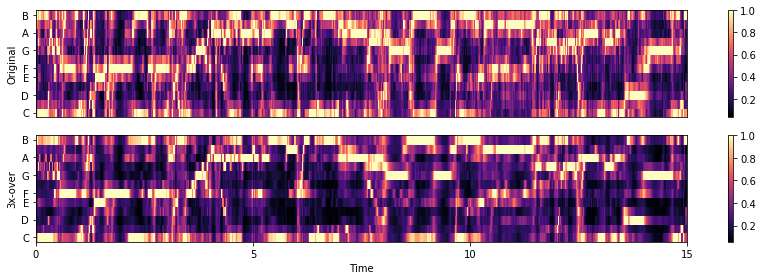

In [27]:
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

plt.show()

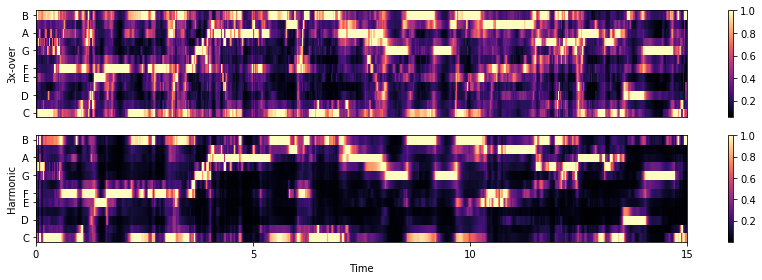

In [28]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('3x-over')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os_harm[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic')
plt.tight_layout()
plt.show()

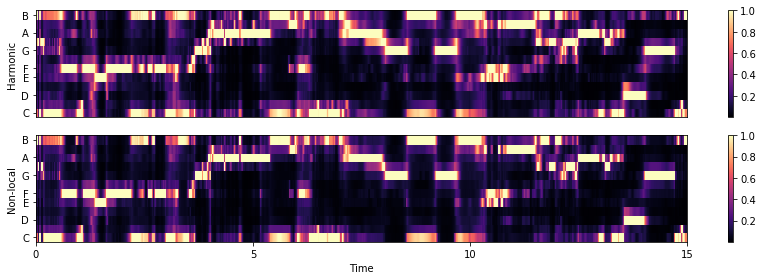

In [29]:
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os_harm[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Harmonic')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Non-local')
plt.tight_layout()
plt.show()

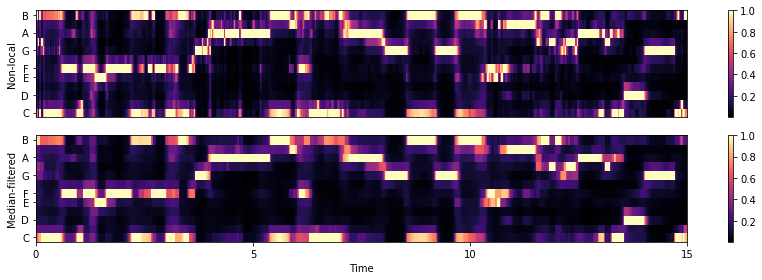

In [30]:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_filter[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Non-local')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Median-filtered')
plt.tight_layout()
plt.show()

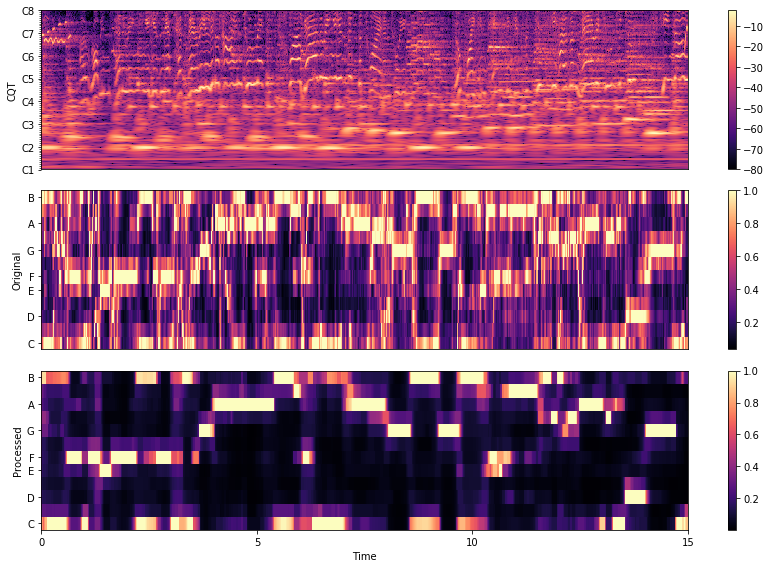

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()

In [33]:
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr, fmin=75, fmax=1600)

np.set_printoptions(threshold=np.nan)
print(pitches[np.nonzero(pitches)])

[  72.484566   80.377106   80.73105    73.85857    75.27836    75.27174
   72.8578     75.499794   78.404655   75.58026    76.824394   78.00787
   80.51443    74.54365    76.17207    78.95591    76.71362    78.26085
   78.67868    77.19223    79.09443    78.39855    77.280304   79.52001
   79.672676   80.54812    78.96898    78.29064    76.13855    79.076324
   74.91598    79.40072    75.17392    73.399284   74.14253    70.779396
   75.40332    75.99438    76.08793    70.16884    72.02761    75.4444
   70.04199    70.784744   72.93755    77.45773    73.038795   73.372635
   77.655464   71.42489    70.36144    73.52749    76.47559    72.96984
   72.9414     73.8167     74.72836    75.64105    71.222855   72.29429
   73.74512    75.97213    78.949814   73.61297    75.9381     77.585175
   72.00529    73.57796    71.29238    74.55338    70.28295    71.9333
   74.84993    77.790184   74.86426    75.507645   77.277054   75.99503
   75.45196    78.43234    79.369286   75.374405   78.404594  

In [34]:
def detect_pitch(y, sr, t):
  index = magnitudes[:, t].argmax()
  pitch = pitches[index, t]
  return pitch

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Barpolar(
    r=[77.5, 72.5, 70.0, 45.0, 22.5, 42.5, 40.0, 62.5],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='11-14 m/s',
    marker=dict(
        color='rgb(106,81,163)'
    )
)
trace2 = go.Barpolar(
    r=[57.49999999999999, 50.0, 45.0, 35.0, 20.0, 22.5, 37.5, 55.00000000000001],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='8-11 m/s',
    marker=dict(
        color='rgb(158,154,200)'
    )
)
trace3 = go.Barpolar(
    r=[40.0, 30.0, 30.0, 35.0, 7.5, 7.5, 32.5, 40.0],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='5-8 m/s',
    marker=dict(
        color='rgb(203,201,226)'
    )
)
trace4 = go.Barpolar(
    r=[20.0, 7.5, 15.0, 22.5, 2.5, 2.5, 12.5, 22.5],
    text=['North', 'N-E', 'East', 'S-E', 'South', 'S-W', 'West', 'N-W'],
    name='< 5 m/s',
    marker=dict(
        color='rgb(242,240,247)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Wind Speed Distribution in Laurel, NE',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    radialaxis=dict(
        ticksuffix='%'
    ),
    orientation=270
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='polar-area-chart')